<a href="https://colab.research.google.com/github/sandhiya-git-hub/AI-Tasks/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = {
    "text": [
    "This product is absolutely amazing! I love it.",
    "Terrible service, waited forever and the food was cold.",
    "It's okay, nothing special, just a regular experience.",
    "Highly recommend, the quality is superb and worth every penny.",
    "I am so disappointed with this purchase, complete waste of money.",
    "The design is sleek, but the battery life is quite poor.",
    "Fantastic movie, captivating plot and great acting.",
    "Mediocre performance, I expected more from this brand.",
    "The customer support was very helpful and resolved my issue quickly.",
    "Never buying from here again, absolutely dreadful quality.",
    "A decent effort, but it needs some improvements.",
    "Absolutely loved the atmosphere and the friendly staff!"
],

"sentiments": [
    "positive",
    "negative",
    "neutral",
    "positive",
    "negative",
    "neutral",
    "positive",
    "negative",
    "positive",
    "negative",
    "neutral",
    "positive"
]

}

In [3]:
df = pd.DataFrame({
    'review': data['text'],
    'sentiment': data['sentiments']
})
df.head()

,review,sentiment
0,This product is absolutely amazing! I love it.,positive
1,"Terrible service, waited forever and the food ...",negative
2,"It's okay, nothing special, just a regular exp...",neutral
3,"Highly recommend, the quality is superb and wo...",positive
4,"I am so disappointed with this purchase, compl...",negative


In [4]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["review"])
y = df["sentiment"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [6]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [7]:
# PREDICT
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [8]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.50
Confusion Matrix:
[[0 0 1]
 [0 1 0]
 [0 1 1]]


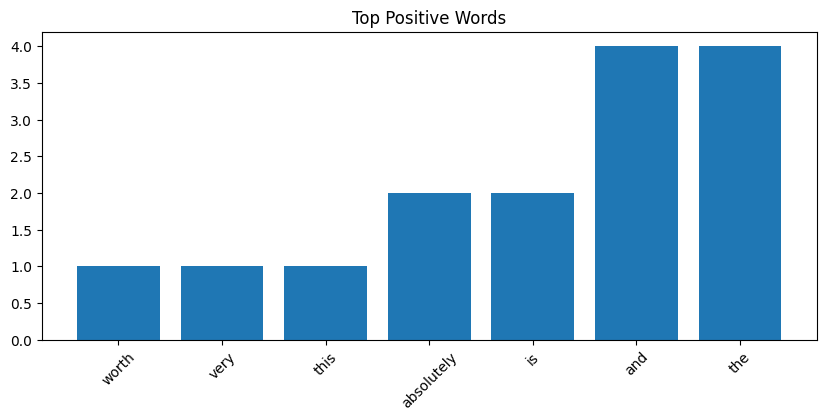

In [9]:
#positive
positive_docs = df[df["sentiment"] == "positive"]["review"]
negative_docs = df[df["sentiment"] == "negative"]["review"]

pos_counts = vectorizer.transform(positive_docs).sum(axis=0).A1
neg_counts = vectorizer.transform(negative_docs).sum(axis=0).A1

words = vectorizer.get_feature_names_out()

# Top N words
N = 7

# Positive
top_pos_idx = pos_counts.argsort()[-N:]
plt.figure(figsize=(10, 4))
plt.bar([words[i] for i in top_pos_idx], pos_counts[top_pos_idx])
plt.title("Top Positive Words")
plt.xticks(rotation=45)
plt.show()


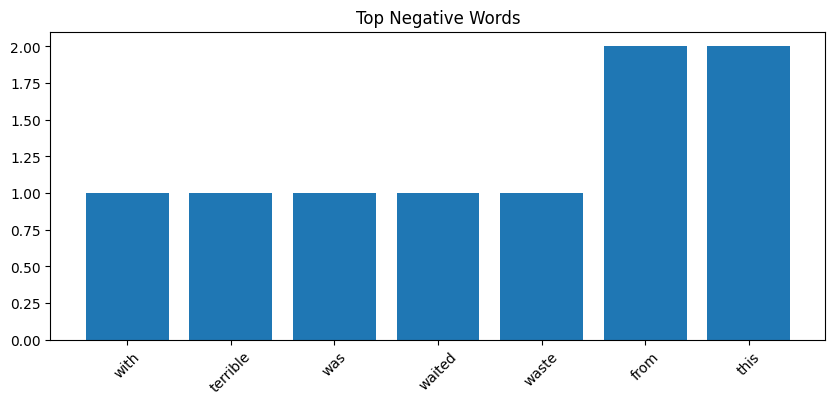

In [10]:
# Negative
top_neg_idx = neg_counts.argsort()[-N:]
plt.figure(figsize=(10, 4))
plt.bar([words[i] for i in top_neg_idx], neg_counts[top_neg_idx])
plt.title("Top Negative Words")
plt.xticks(rotation=45)
plt.show()

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [12]:
data = {
    "text": [
        "I love this product", "This is amazing", "Very happy with this",
        "What a great experience", "Absolutely fantastic", "I like it a lot",
        "I hate this item", "This is terrible", "I am very sad",
        "What a bad experience", "Absolutely horrible", "I dislike it"
    ],
    "label": [
        "positive","positive","positive","positive","positive","positive",
        "negative","negative","negative","negative","negative","negative"
    ]
}

df = pd.DataFrame(data)

In [13]:
df.head()

,text,label
0,I love this product,positive
1,This is amazing,positive
2,Very happy with this,positive
3,What a great experience,positive
4,Absolutely fantastic,positive


In [14]:
#Convert text to Binary Features (0/1)
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(df["text"])
y = df["label"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [16]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [17]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.25


In [18]:
feature_names = vectorizer.get_feature_names_out()
log_prob = model.feature_log_prob_

# log_prob[0] -> negative class
# log_prob[1] -> positive class

prob_negative = np.exp(log_prob[0])
prob_positive = np.exp(log_prob[1])

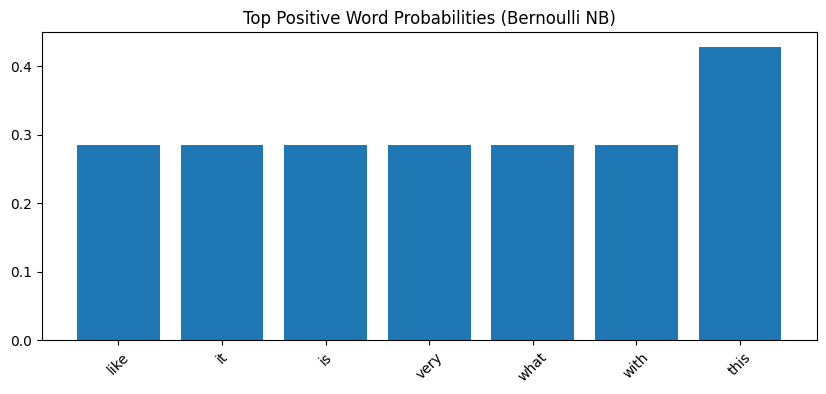

In [19]:
#Plot Top Positive Words
top_pos_idx = prob_positive.argsort()[-7:]

plt.figure(figsize=(10,4))
plt.bar([feature_names[i] for i in top_pos_idx], prob_positive[top_pos_idx])
plt.xticks(rotation=45)
plt.title("Top Positive Word Probabilities (Bernoulli NB)")
plt.show()

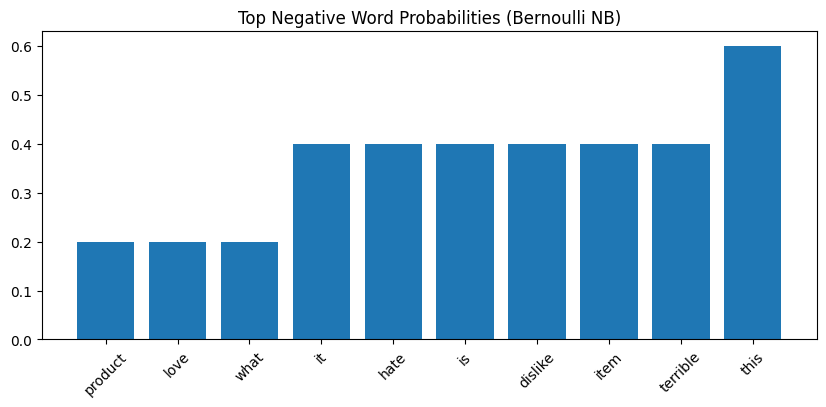

In [20]:
# Plot Top Negative Words
top_neg_idx = prob_negative.argsort()[-10:]

plt.figure(figsize=(10,4))
plt.bar([feature_names[i] for i in top_neg_idx], prob_negative[top_neg_idx])
plt.xticks(rotation=45)
plt.title("Top Negative Word Probabilities (Bernoulli NB)")
plt.show()